# Tarea 1 
# Física computacional
## Aquino Chapa Martha Abril
##### Hecho en Python 🐍

 <span style='color:green'>

In [1]:
#importamos las paqueterías
from pylab import *
import random
from numpy import array
from numpy import *
import math

## 1. Realice y explique los desarrollos necesarios para obtener los siguientes algoritmos:
#### (a) Encuentre una expresión para la segunda derivada numérica de orden 4 con malla uniforme. (Se desprecian téminos $h^{5}$ en la serie de Taylor)


Iniciamos expandiendo en serie de Taylor la función f en 4 diferentes puntos alrededor de $x_0$

$$
f(x_0+h)=f(x_0) + f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2!}h^2 + \frac{f^{(3)}(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0-h)=f(x_0) - f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2!}h^2 - \frac{f^{(3)}(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0+2h)=f(x_0) + 2f^{(1)}(x_0)h + 2f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(3)}(x_0)h^3 + \frac{2}{3}f^{(4)}(x_0)h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0-2h)=f(x_0) - 2f^{(1)}(x_0)h + 2f^{(2)}(x_0)h^2 - \frac{4}{3}f^{(3)}(x_0)h^3 + \frac{2}{3}f^{(4)}(x_0)h^4 + \mathcal{O}(h^5)
$$
Debido a que queremos la segunda derivada de orden cuatro despreciamos los términos de orden $h^5$, sumamos la primera y segunda expresión así como la tercera y cuarta expresión. Con lo que obtenemos las siguientes dos ecuaciones:

$$
f(x_0+h)+f(x_0-h)=2f(x_0)+f^{(2)}(x_0)h^2 + \frac{1}{12}f^{(4)}(x_0)h^4
$$
$$
f(x_0+2h)+f(x_0-2h)=2f(x_0)+4f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(4)}(x_0)h^4
$$

Ahora mutiplicamos la primera de estas igualdades por $16$ y la segunda igualdad por $-1$ y obtenemos el siguiente sistema de ecuaciones:
$$
16f(x_0+h)+16f(x_0-h)=32f(x_0) + 16f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(4)}(x_0)h^4
$$
$$
-f(x_0+2h)-f(x_0-2h)=-2f(x_0)-4f^{(2)}(x_0)h^2 - \frac{4}{3}f^{(4)}(x_0)h^4
$$
Al sumar las dos ecuaciones anteriores se obtiene: 
$$
16f(x_0+h)+16f(x_0-h)-f(x_0+2h)-f(x_0-2h)=30f(x_0)+12f^{(2)}(x_0)h^2
$$

Por lo que tenemos la expresión para la segunda derivada de orden cuatro:

$$
f^{(2)}(x_0) = \frac{16f(x_0+h)+16f(x_0-h)-f(x_0+2h)-f(x_0-2h) - 30f(x_0)}{12h^2}
$$
Donde se ha tomado $h=x_{i+1}-x_i$, por lo cual hay que notar que la expresión anterior hace uso del hecho de que se tienen puntos a la derecha y a la izquiera de $x_0$, por lo cual la expresión anterior no se vale en los puntos frontera. Entonces obtengamos la derivada en los puntos frontera. 

Veamos el caso de la frontera izquiera, para esto, usaremos los h, 2h, 3h, 4h es decir nos estamos tomando los puntos a la derecha.
Realizando las expansiones en serie de Taylor correspondiente, despresiando terminos $h^{5}$, se obtiene:

$$f(x_0+h)=f(x_0)+hf^{(1)}(x_0)+{\frac{1}{2}}f^{(2)}(x_0)h^{2}+\frac{f^{(3)}(x_0)}{3!}h^{3}+{\frac{f^{(4)}}{4!}}h^{4}   $$


$$f(x_0+2h)=f(x_0)+2hf^{(1)}(x_0)+{\frac{4}{2}}f^{(2)}(x_0)h^{2}+\frac{8f^{(3)}(x_0)}{3!}h^{3}+{16\frac{f^{(4)}}{4!}}h^{4}   $$

$$f(x_0+3h)=f(x_0)+3hf^{(1)}(x_0)+{\frac{9}{2}}f^{(2)}(x_0)h^{2}+\frac{27f^{(3)}(x_0)}{3!}h^{3}+{81\frac{f^{(4)}}{4!}}h^{4}   $$

$$f(x_0+4h)=f(x_0)+4hf^{(1)}(x_0)+{\frac{16}{2}}f^{(2)}(x_0)h^{2}+\frac{64f^{(3)}(x_0)}{3!}h^{3}+{256\frac{f^{(4)}}{4!}}h^{4}   $$

Es posible ver el sistema anterior como la siguiente matriz:
$$
\begin{bmatrix}
1 & \frac{1}{2} & \frac{1}{6} & \frac{1}{24} \\
2 & 2 & \frac{4}{3} & \frac{2}{3} \\
3 & \frac{9}{2} & \frac{9}{2} & \frac{27}{8} \\
4 & 8 & \frac{32}{3} & \frac{32}{3}
\end{bmatrix}
\begin{bmatrix}
hf_i' \\
h^2f_i'' \\
h^3f_i''' \\
h^4f_i''''
\end{bmatrix}
=
\begin{bmatrix}
f_{i+1}-f_i \\
f_{i+2}-f_i \\
f_{i+3}-f_i \\
f_{i+4}-f_i 
\end{bmatrix}
$$
Cuya solución para la segunda derivada es:

$$f^{(2)}(x_0)={\frac{-104(f_{i+1}-f_i)+114(f_{i+2}-f_i)-56(f_{i+3}-f_i)+11(f_{i+4}-f_i)}{12h^{2}}}  $$
Lo cual se puede reducir a lo siguiente:

$$f^{(2)}(x_0)={\frac{-104f_{i+1}+114f_{i+2}-56f_{i+3}+11f_{i+4}+35f_i)}{12h^{2}}}  $$
Esta ecuación es para la ''primera'' frontera izquierda, para el segundo punto en la malla simplemente se debe tomar $i\rightarrow i+1$, además para la frontera derecha basta hacer los siguientes cambios $i+1\rightarrow i-1$, $i+2\rightarrow i-2$, $i+3\rightarrow i-3$, $i+4\rightarrow i-4$, así como utilizar i=N.
Ahora definamos una función en Python con la que se obtenga la segunda derivada de orden 4.

In [2]:
## :D
##Definimos la segunda derivada de orden 4 para una función f y cuya malla es uniforme.
def deriv(f,x):
    f_prima1 = zeros(len(f))
    h=x[1]-x[0]
   
    for i in range (2,len(f)-2):
        f_prima1[i]=(16*f[i+1]+16*f[i-1]-f[i+2]-f[i-2]-30*f[i])/(12*h*h)
    
       #Calculamos los puntos frontera a la izquierda
        f_prima1[0] = (-(26/3)*f[1]+(19/2)*f[2]-(14/3)*f[3]+(11/12)*f[4]+(35/12)*f[0])/(h*h)
        f_prima1[1] = (-(26/3)*f[2]+(19/2)*f[3]-(14/3)*f[4]+(11/12)*f[5]+(35/12)*f[1])/(h*h)
        
        #Calculando los puntos para frontera a la derecha
        f_prima1[-2]=((-26/3)*f[-3]+(19/2)*f[-4]-(14/3)*f[-5]+(11/12)*f[-6]+(35/12)*f[-2])/(h*h)
        f_prima1[-1]=((-26/3)*f[-2]+(19/2)*f[-3]-(14/3)*f[-4]+(11/12)*f[-5]+(35/12)*f[-1])/(h*h)
    return f_prima1

In [ ]:
#Comprobando que la función anterior se aproxima a la segunda derivada 
#En una función f con una malla uniforme
###Escogemos la malla uniforme
x1 = linspace(0,2*pi,500)
#Escogemos la función de prueba
y1 =cos(x1)
y_deriv2 =-cos(x1)
y_num_deriv2 = deriv(y1,x1)
#Graficamos para corroborar que la derivada numerica corresponda con la derivinada analítica
plot(x1,y_deriv2,label="$f'(x)$")
plot(x1,y_num_deriv2,label="f'(x) numérica")
legend(),grid()
show()


##### (b) Encuentre una expresión para la derivada numérica de 2o orden para una malla no uniforme. (Se desprecian términos $h^{3}$ en la serie de Taylor).
Debido a que queremos la derivada en una malla no uniforme, tendremos dos valores de h, h1 para el lado izquierdo y h2 para el lado derecho, además despreciaremos términos $h^{3}$, consideremos entonces las siguientes expansiones en serie de Taylor alrededor de un punto $x_0$:
$$
f(x_0-h_1)=f(x_0)-f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h^3)
$$

$$
f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$
Multiplicamos por $h_2^{2}$ la primera y por $h_1^{2}$ la segunda ecuación


$$ h_2^{2}f(x_0-h_1)=h_2^{2}f(x_0)-h_2^{2}f^{(1)}(x_0)h_1+{\frac{1}{2}}f^{(2)}(x_0)h_1^{2}h_2^{2}+\mathcal{O}(h^{3})  $$

$$
h_1^{2}f(x_0+h_2)=h_1^{2}f(x_0)+h_1^{2}f^{(1)}(x_0)h_2 + h_1^{2}\frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$

Restando las dos ecuaciones anteriores y despreciando los términos al cubo
$$h_1^{2}f(x_0+h_2)-h_2^{2}f(x_0-h_1)=f(x_0)(h_1^{2}-h_2^{2})+f^{(1)}(x_0)(h_2^{2}h_1+h_2h_1^{2}) $$

Por lo cual se obtiene que la expresión para la segunda derivada de 2do orden, en los puntos que no están en la frontera es:
$$ f^{(1)}(x_0)={\frac{h_1^{2}f(x_0+h_2)-h_2^{2}f(x_0-h_1)-f(x_0)(h_1^{2}-h_2^{2})}{h_2^{2}h_1+h_2h_1^{2}}} $$
Obteniendo ahora la derivada para los puntos frontera, iniciemos con la frontera derecha, por lo cual tomaremos h1=x1-x0, h2=x2-x0.
Realizamos la expansión en serie de Taylor:

$$
f(x_0+h_1)=f(x_0)+f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h^3)
$$

$$
f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$
Despreciando los términos al cubo y situando el sistema anterior como un sistema matricial obtenemos que:

$$
\begin{bmatrix}
h1 & \frac{h1^{2}}{2}\\ 
h2& \frac{h2^{2}}{2} \\
\end{bmatrix}
\begin{bmatrix}
f_i' \\
f_i'' 
\end{bmatrix}
=
\begin{bmatrix}
f_{i+1}-f_i \\
f_{i+2}-f_i 
\end{bmatrix}
$$

El cual al resolver para f' se obtiene :
$$f'(x_0)=\frac{-(f_{i+2}-f_i)h_1^{2}+h_2^{2}(f_{i+1}-f_i)}{h_1h_2^{2}-h_1^{2}h_2}    $$

Lo que podemos reducir a:
$$f'(x_0)=\frac{-h_1^{2}f_{i+2}+h_2^{2}f_{i+1}+f_i(-h_2^{2}+h_1^{2})}{h_1h_2^{2}-h_1^{2}h_2}   $$
Esta ecuación es para la frontera izquierda, para la frontera derecha basta hacer los siguientes cambios $i+1\rightarrow i-1$, $i+2\rightarrow i-2$ así como utilizar i=N.
Definamos ahora la función que nos de la primera derivada de orden 2 con una malla no uniforme.

In [3]:
## Ya está bien definida :D probada como sinx,cosx,e^(x^2)
#Definimos la funcion para la primera derivada en un malla no uniforme
def deriv_1(f,x):
    f_prima = zeros(len(f))
    for i in range (1,len(f)-1):
        f_prima[i]=(((x[i]-x[i-1])**2)*(f[i+1])-((x[i+1]-x[i])**2)*f[i-1]-f[i]*((x[i]-x[i-1])**2-(x[i+1]-x[i])**2))/((x[i+1]-x[i])**2*(x[i]-x[i-1])+(x[i]-x[i-1])**2*(x[i]-x[i-1]))
    #Obtenemos la derivada en la frontera:
        h1=x[1]-x[0]
        h2=x[2]-x[0]
        
        h11=(x[-1]-x[-2])
        h22=(x[-1]-x[-3])
        ## Iniciamos con la frontera izquierda
        f_prima[0]=(-h1**2*f[2]+h2**2*f[1]+f[0]*(-h2**2+h1**2))/(h1*h2**2-h1**2*h2)
        #Ahora obtenemos con la frontera derecha
        f_prima[-1]=((+h11**2*f[-3])-h22**2*f[-2]+f[-1]*(+h22**2-h1**2))/(h11*h22**2-h11**2*h22)
    return f_prima

In [ ]:
#Provemos que la función anterior se acopla bien a la derivada analítica
#Definimos la malla uniforme 
x = (np.linspace(0, 2*pi, 500, endpoint=False))
#Definimos la función a la que le aplicaremos la derivada
y = cos(x)
#Definimos la primera derivada analítica
y_deriv =-sin(x)
#Definimos la primera derivada númerica
y_deriv_1_num = deriv_1(y,x)

#Las graficamos para comparar las primera derivadas y revisar que el código funciona adecuadamente
plot(x,y_deriv,label="$f'(x)$")
plot(x,y_deriv_1_num,label="f'(x) numérica")
legend(),grid()
show()
##Se aprecia que la derivada analítica se acopla a la derivada númerica

##### (c) Encuentre una expresión para la segunda derivada numérica de 2o orden con malla no uniforme. (Se desprecian términos $h^{3}$  en la serie de Taylor)

Debido a que queremos la derivada en una malla no uniforme, tendremos dos valores de h, h1 para el lado izquierdo y h2 para el lado derecho, además despreciaremos términos $h^{3}$, consideremos entonces las siguientes expansiones en serie de Taylor alrededor de un punto $x_0$:
$$ f(x0-h_1)=f(x_0)-f^{(1)}(x_0)h_1+{1/2}f^{(2)}(x_0)h_1^{2}+\mathcal{O}(h_1^{3})  $$
$$ f(x0+h_2)=f(x_0)+f^{(1)}(x_0)h_2+{1/2}f^{(2)}(x_0)h_2^{2}+\mathcal{O}(h_2^{3})  $$

Multiplicando por $h_1$ y por $h_2$ la segunda y la primera ecuación se obtiene que:

$$ h_2f(x0-h_1)=h_2f(x_0)-h_2f^{(1)}(x_0)h_1+{1/2}h_2f^{(2)}(x_0)h_1^{2}+\mathcal{O}(h_1^{3})  $$
$$ h_1f(x0+h_2)=h_1f(x_0)+h_1f^{(1)}(x_0)h_2+{1/2}h_1f^{(2)}(x_0)h_2^{2}+\mathcal{O}(h_2^{3})  $$

Sumando las ecuaciones anteriores y despreciando términos al cubo:
$$h_2f(x_0-h_1)+h_1f(x_0+h_2)=f(x_0)(h_2+h_1)+{\frac{1}{2}}f^{(2)}(x_0)(h_2h_1^{2}+h_1h_2^{2}) $$

$$ f^{(2)}(x_0)=2*\frac{h_2f(x_0-h_1)+h_1f(x_0+h_2)-f(x_0)(h_2+h_1)}{(h_2h_1^{2}+h_1h_2^{2})} $$

Obteniendo ahora la derivada para los puntos frontera, inciemos con la frontera derecha, por lo cual tomaremos h1=x1-x0, h2=x2-x0.
Realizamos la expansión en serie de Taylor:
$$
f(x_0+h_1)=f(x_0)+f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h^3)
$$

$$
f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$
Despreciando los términos al cubo y situando el sistema anterior como un sistema matricial obtenemos que:
$$
\begin{bmatrix}
h1 & \frac{h1^{2}}{2}\\ 
h2& \frac{h2^{2}}{2} \\
\end{bmatrix}
\begin{bmatrix}
f_i' \\
f_i'' 
\end{bmatrix}
=
\begin{bmatrix}
f_{i+1}-f_i \\
f_{i+2}-f_i 
\end{bmatrix}
$$

Al resolver el sistema anterior para $f^{(2)}$ se obtiene:
$$f''(x_0)= 2*{\frac{(f_{i+2}-f_i)*h_1-(f_{i+1}-f_i)h_2}{h_1h_2^{2}-h_1^{2}h_2}}  $$
Lo cual se puede reducir a:

$$f''(x_0)=2*{\frac{f_{i+2}h_1-h_2f_{i+1}+f_i(h_2-h_1)}{h_1h_2^{2}-h_1^{2}h_2}}  $$
Esta ecuación es para la frontera izquierda, para la frontera derecha basta hacer los siguientes cambios  𝑖+1→𝑖−1 ,  𝑖+2→𝑖−2, así como utilizar i=N.
Definiendo ahora una función segunda derivada con una malla no uniforme:

In [4]:
### Lista, proboda con x**3, sinx, cosx, sin2x :D 
##Definimos la funcion segunda derivada para una función f y cuya malla no es uniforme.
def deriv_2(f,x):
    f_prima2 = zeros(len(f))

    for i in range (1,len(f)-1):
        h1=x[i]-x[i-1]
        h2=x[i+1]-x[i]
        f_prima2[i]=(2/(h2*h1**2+h1*h2**2))*(h2*f[i-1]+h1*f[i+1]-f[i]*(h2+h1))
    # Obteniendo la derivada en las fronteras
    #frontera izquierda
        h11=x[1]-x[0]
        h22=x[2]-x[0]
        f_prima2[0]=(2/(h11*h22**2-h11**2*h22))*(f[2]*h11-h22*f[1]+f[0]*(h22-h11))
        
     #frontera derecha
        h111=x[-1]-x[-2]
        h222=x[-1]-x[-3]
        f_prima2[-1]=(2/(h111*h222*h222-h111**2*h222))*(f[-3]*h111-h222*f[-2]+f[-1]*(h222-h111))
        
    return f_prima2

In [ ]:
#Probando la función anterior
###Escogemos la malla
x = (np.linspace(-2*pi, 2*pi, 5000) )
##Escogemos la funcion f a la cual le aplicaremos la segunda derivada
y = cos(x)
y_deriv2 = -cos(x)
y_num_deriv_2 = deriv_2(y,x)
plot(x,y_deriv2,label="$f''(x)$")
plot(x,y_num_deriv_2,label="f''(x) numérica")
legend(),grid()
show()

## 2. Utilizando las funciones anteriores calcule el tiempo promedio para una malla con 500 puntos en cadauno de los algoritmos anteriores. De una explicación de las ventajas y desventajas de cada una las funciones antes mencionadas.

### Iniciamos obteniendo el tiempo con una malla uniforme y con la función segunda derivada de orden 4:

In [ ]:
#Definimos la malla uniforme con 500 puntos y
x = (np.linspace(0, 2*pi, 500))
#Definimos la función a la que le aplicaremos la derivida
y = cos(x)
#Definimos la segunda derivada númerica de orden 4
y_deriv_1_num = deriv(y,x)

#Obtenemos el tiempo de la función 
%timeit (deriv(y,x))

### Obteniendo el tiempo con una malla no uniforme y con la función primera derivada de orden 2:


In [ ]:
#Definimos la malla uniforme con 500 puntos y se le aplica la función
x = (np.linspace(0, 2*pi, 500))
#Definimos la función a la que le aplicaremos la derivida
y = cos(x)

#Definimos la primera derivada númerica
y_deriv_1_num = deriv_1(y,x)

#Obtenemos el tiempo de la función 
%timeit (deriv_1(y,x))

### Obteniendo el tiempo con una malla no uniforme y con la función segunda derivada de orden 2:

In [ ]:
###Escogemos la malla y le aplicamos la función
x = (np.linspace(0, 2*pi, 500) )
##Escogemos la funcion f a la cual le aplicaremos la 
#segunda derivada
y = cos(x)
#Obtenemos el tiempo de la función 
%timeit (deriv_2(y,x))

De comparar los tiempo promedio se aprecia  que el tiempo más rápido fue el correspondiente a la función segunda derivada en una malla no uniforme. Una de las ventajas de la segunda derivada de orden 2 contra la de orden 4, es que la primera posee un tiempo promedio más rápido, otra ventaja de la derivada de orden 2 es que, debido a que está pensada en una malla no uniforme, es posible sacar la derivada en cualquier mallas, cosa que no pasa con la derivada de orden 4. Sin embargo, la derivada de orden 4, almenos de manera teórica, posee mayor precisión que la de orden 2, sí que dependerá de la situación en la que se encuentre la función para saber cual es la más adecuada de usa.

### 3. Calcule la derivada analítica de las funciones $f(x) = e^{−x^{2}} sin(10x)$ con $x \in [−5, 5]$ , y $g(x)=-\frac{2}{x^{6}}+{\frac{1}{x^{12}}}$ con $x \in [0.5, 5]$. Realice las gráficas de las funciones y sus primeras dos derivadas. Con las funciones del problema 1, encuentre una malla adecuada para cada caso en el que el error de cálculo sea menor que $10−5$ para cualquier punto. ¿Las mallas tienen el mismo espacio entre puntos de la malla?, explique porque si o porque no.

Iniciemos obtiendo las derivadas analíticas:
$$f'(x)=2e^{-x^{2}}(5\cos(10x)-x\sin(10x) $$
$$f^{(2)}=e^{-x^{2}}(2(2x^{2}-51)\sin(10x)-40x\cos(10x))$$
Por otro lado::
$$g'(x)={\frac{12}{x^{-7}}}-{\frac{12}{x^{13}}} $$ 

$$g''(x)=-\frac{84}{x^{-8}}+\frac{156}{x^{-14}}  $$

Iniciamos graficando las funciónes:
Para $f(x) = e^{−x^{2}} sin(10x)$ con $x \in [−5, 5]$

In [ ]:
x=(linspace(-5,5,1000))
y=exp(-(x**2))*sin(10*x)

plot(x,y,label="f'(x)")

legend(),grid()
show()


In [ ]:
x=(linspace(0.5,5,1000))
y=-2/x**6+1/x**12
plot(x,y,label="f(x)")
legend(),grid()
show()

Obteniendo ahora las derivadas de las funciones f y g.
Iniciemos con la función f

In [ ]:
##:DDD
x=(linspace(-5,5,1000000))
y=exp(-(x**2))*sin(10*x)
## La derivada analitica
yprima1=2*exp(-(x*x))*(5*cos(10*x)-x*sin(10*x))
##La derivada analítica para una malla no uniforme
yprima1_num=deriv_1(y,x)

#Graficamos ambas derivadas
plot(x,yprima1,label="f'(x)")
plot(x,yprima1_num,label="f'(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yprima1-yprima1_num)) )

In [ ]:
x1=(linspace(-5,-2.5,1000000))#,endpoint=False))
x2=linspace(-2.5,-2,10000,endpoint=False)
x=ma.concatenate((x1,x2),axis=None)
y=exp(-(x**2))*sin(10*x)
## La derivada analitica
yprima2_2=2*exp(-(x*x))*(2*x**2*sin(10*x)-51*sin(10*x)-20*x*cos(10*x))
##La derivada analítica para una malla no uniforme
yprima2_2_num=deriv_2(y,x)

#Graficamos ambas derivadas
plot(x,yprima2_2,label="f'(x)")
plot(x,yprima2_2_num,label="f'(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yprima2_2-yprima2_2_num)) )

In [ ]:
def malla(x):
    return tan(x)

y1=(linspace(1,1.5,10000))
y2=linspace(1.5,2,500)
y3=linspace(2,3.5,500)
y2=linspace(3.5,5,100)

def malla(x):
    return 2*tanh(x) #x**2*sin(100*x)*cos((x**6))*sin(x**2)


x1=(linspace(0.5,0.55,100000,endpoint=True))
x2=(linspace(0.55,0.6,50500))
result=np.concatenate((x1,x2))
m = []
for item in result:
    if item not in m:
        m.append(item)
        

x=x1
#,axis=0)
y=-2/x**6+x**(-12)
#print(x)
## La derivada analitica
yprima1=12/x**7-12*x**(-13)

yprima1_num=deriv_1(y,x)

#plot(x,y,label="f(x)")
plot(x,yprima1,label="f'(x)")
plot(x,yprima1_num,label="f'(x) númerica")
#plot(x,y,label="f'(x) númerica")
legend(),grid()
show()
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yprima1-yprima1_num)) )

In [ ]:
x=(linspace(-5,5,100000000))
y=exp(-(x**2))*sin(10*x)
## La derivada analitica
yprima2_1=2*exp(-(x*x))*(2*x**2*sin(10*x)-51*sin(10*x)-20*x*cos(10*x))
##La derivada analítica para una malla no uniforme

##La derivada analítica para una malla no uniforme
yprima2_1_num=deriv(y,x)

#Graficamos ambas derivadas
plot(x,yprima2_1,label="f'(x)")
plot(x,yprima2_1_num,label="f'(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yprima2_1-yprima2_1_num)) )

In [ ]:
x=linspace()
y=exp(-(x1*x1))*sin(10*x1)
yprima2=exp(-(x1*x1))*(((4*x1*x1-102)*sin(10*x1))-(40*x1*cos(10*x1)))

yprima2_num=deriv_2(y,x1)

plot(x1,yprima2,label="f(x)")
plot(x1,yprima2_num,label="f''(x) númerica")
#legend(),grid()
#show()
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yprima2-yprima2_num)) )

#print(exp(log(5)))

Pasemos ahora a obtener la derivada y las mallas de la funcion g.

C:\Users\marth\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


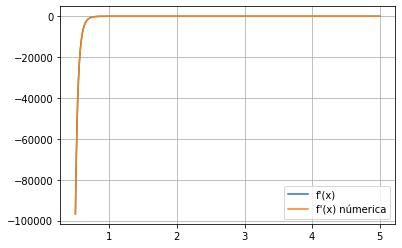

Error de la segunda derivada no uniforme = 1.8868086044676602e-05


In [110]:
def f(x):
    return x*0.01
# con la siguiente malla tengo el siguiente error 0.00192244489153381440.0019224448915338144
###x=(linspace(0.5,5,500000))
#x=(linspace(0.5,5,505000)) 0.0018847433384507895
x=(linspace(0.5,5,5050000))
x2=(linspace(0.8+h,5,5050000))
h=x2[1]-x2[0]
x1=(linspace(0.5,0.8,5550000))
#x=np.concatenate((x1,x2))
y=-2*x**(-6)+x**(-12)
## La 2da derivada analitica
yprima1_1=12*x**(-7)-12*x**(-13)
#La derivada analítica para una malla no uniforme

##La derivada analítica para una malla no uniforme
yprima1_1_num=deriv_1(y,x)

#Graficamos ambas derivadas
plot(x,yprima1_1,label="f'(x)")
plot(x,yprima1_1_num,label="f'(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yprima1_1-yprima1_1_num)) )

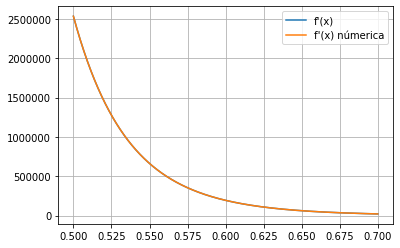

Error de la segunda derivada no uniforme = 0.009640719275921583


In [139]:
m=10000000
def f (x):
    return m*sin(x)

#x=f(linspace(0,arcsin(4.5/m),10000))+0.5
#x=(linspace(0.5,5,5050000)) erro de 20
x=(linspace(0.5,0.7,5000))

y=-2/x**6+1/x**12
## La 2da derivada analitica
yprima2_1=-84/x**8+156/x**14
#La derivada analítica para una malla no uniforme

##La derivada analítica para una malla no uniforme
yprima2_1_num=deriv(y,x)

#Graficamos ambas derivadas
plot(x,yprima2_1,label="f'(x)")
plot(x,yprima2_1_num,label="f'(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yprima2_1-yprima2_1_num)) )

### 4. Suponga que tiene la función $sinc(x) =\frac{ sin(3x)}{3x}$ en el intervalo$ [−2π, 2π]$. Calcule la derivada analítica de dicha función y calcule la derivada numérica utilizando una malla uniforme.

### (a) Dependiendo del lenguaje de programación que utilice, averig\u''e la manera de obtener los tiempos de ejecución para calcular la derivada utilizando los algoritmos de 2o y 4o orden.

### (b) Comparando con la solución analítica, encuentre el espacio entre los puntos de la malla para que el error máximo en el cálculo sea menor a $10^{-5}$ para cada algoritmo.

### (c) Realice la gráfica del “Número de puntos en el espaciamiento de la malla” vs “Tiempo de ejecución” partiendo de un espaciamiento en los puntos en la malla de 0.25 hasta el espaciamiento encontrado en el inciso b). Por o menos considere 15 puntos, es decir 15 mallas deferentes, para realizar este ejercicio.

### (d) ¿Qué puede concluir de este experimento numérico?

Las derivadas analíticas de la función sinc(x) son:
    $$sinc'(x)=\frac{3x\cos(3x)-\sin(3x)}{3x^2}  $$

$$sinc''(x)=\frac{(2-9x^{2})\sin(3x)-6x\cos(3x)}{3x^{3}}$$

####  a) Para obtener los tiempos de ejecución se debe importar:

In [ ]:
import time

Iniciamos obteniendo los tiempos de ejecución de la primer derivada en una malla uniforme.

In [ ]:
#Iniciamos definiendo la malla donde se evaluara la funcion
x = linspace(-2*pi,2*pi,500)
#Iniciamos a correr el tiempo
inicio = time.time()
#definimos la función a la que se medirá el tiempo de ejecución
deriv_1(sin(3*x)/(3*x),x)
#terminamos de contar el tiempo
fin = time.time()
#Restamos el tiempo inicial y el tiempo final para obtener
#el tiempo de ejecución
t_i = fin - inicio 
#Le pedimos al programa que nos imprima el tiempo de ejecución
print("El tiempo de ejecución de la primera derivada es: ",t_i)

Obteniendo una mejor aproximación:

In [ ]:
x = linspace(-2*pi,2*pi,500)
n_experimentos = 100 ## numero de veces que repitos el ciclo
t_is =  zeros(n_experimentos)
for i in range(n_experimentos):
    inicio = time.time()
    deriv_1(sin(3*x)/(3*x),x)
    fin = time.time()
    t_is[i] = fin - inicio
print("Tiempo de ejecución, más aproximado, de la primera derivada es:  ",mean(t_is))

Obteniendo el tiempo de ejecución para la segunda derivada: 

In [ ]:
##Obteniendo los tiempos de ejecución de la segunda derivada en una
##malla no uniforme
#Iniciamos definiendo la malla donde se evaluara la funcion
x = linspace(-2*pi,2*pi,500)
#Iniciamos a correr el tiempo
inicio = time.time()
#definimos la función a la que se medirá el tiempo de ejecución
deriv_2(sin(3*x)/(3*x),x)
#terminamos de contar el tiempo
fin = time.time()
#Restamos el tiempo inicial y el tiempo final para obtener
#el tiempo de ejeción
t_i = fin - inicio 
#Le pedimos al programa que nos imprima el tiempo de ejecución
print("Tiempo de ejecución de la segunda derivada es: ",t_i)

Obteniendo una mejor aproximación del tiempo de ejecución:

In [ ]:
x = linspace(-2*pi,2*pi,500)
n_experimentos = 100 ## numero de veces que repitos el ciclo
t_is =  zeros(n_experimentos)
for i in range(n_experimentos):
    inicio = time.time()
    deriv_2(sin(3*x)/(3*x),x)
    fin = time.time()
    t_is[i] = fin - inicio
print("Tiempo de ejecución, más aproximado, de la segunda derivada:  ",mean(t_is))

Obteniendo el tiempo de ejecución para la segunda derivada de orden 4:

In [ ]:
##Obteniendo los tiempos de ejecución de la segunda derivada de orden 4
#Iniciamos definiendo la malla donde se evaluara la funcion
x = linspace(-2*pi,2*pi,500)
#Iniciamos a correr el tiempo
inicio = time.time()
#definimos la función a la que se medirá el tiempo de ejecución
deriv(sin(3*x)/(3*x),x)
#terminamos de contar el tiempo
fin = time.time()
#Restamos el tiempo inicial y el tiempo final para obtener
#el tiempo de ejeción
t_i = fin - inicio 
#Le pedimos al programa que nos imprima el tiempo de ejecución
print("Tiempo de ejecución de la segunda derivada de orden 4 es: ",t_i)

In [ ]:
x = linspace(-2*pi,2*pi,500)
n_experimentos = 100 ## numero de veces que repitos el ciclo
t_is =  zeros(n_experimentos)
for i in range(n_experimentos):
    inicio = time.time()
    deriv(sin(3*x)/(3*x),x)
    fin = time.time()
    t_is[i] = fin - inicio
print("Tiempo de ejecución, más aproximado, de la segunda derivada:  ",mean(t_is))

### b) Comparando con la solución analítica, encuentre el espacio entre los puntos de la malla para que el error máximo en el cálculo sea menor a 10−5 para cada algoritmo.

In [ ]:
##Definimos la malla:
x=linspace(-2*pi,2*pi,7500)
#obteniendo el espacio entre los puntos:
h=x[1]-x[0]
#definimos la función a la que se le aplicará la primera derivada
sinc=sin(3*x)/(3*x)
## La derivada analitica
sincprima1=(3*x*cos(3*x)-sin(3*x))/(3*x*x)
#la primer derivada númerica definida con malla no uniforme
sincprima1_num=deriv_1(sinc,x)

print("Error de la primer derivada no uniforme es:" ,
      max(abs(sincprima1-sincprima1_num)) )
print("El espacio entre los puntos es:",h)

Veamos el caso para la segunda derivada:

In [ ]:
##Definimos la malla:
## :D
x=linspace(-2*pi,2*pi,2*550000)
#obteniendo el espacio entre los puntos:
h=x[1]-x[0]
#definimos la función a la que se le aplicará la primera derivada
sinc=sin(3*x)/(3*x)
## La derivada analitica
sincprima2=((2-9*x**2)*sin(3*x)-6*x*cos(3*x))/(3*x**3)

#yprima2=exp(-(x*x))*(((2*x*x-102)*sin(10*x))-(40*x*cos(10*x)))
sincprima2_num=deriv_2(sinc,x)

print("Error de la segunda derivada no uniforme es" ,
      max(abs(sincprima2-sincprima2_num)) )
print("El espacio entre los puntos es:",h)

In [ ]:
x=linspace(-2*pi,2*pi,2*550000)
#obteniendo el espacio entre los puntos:
h=x[1]-x[0]
#definimos la función a la que se le aplicará la primera derivada
sinc=sin(3*x)/(3*x)
## La derivada analitica
sincprima2_1=((2-9*x**2)*sin(3*x)-6*x*cos(3*x))/(3*x**3)

#yprima2=exp(-(x*x))*(((2*x*x-102)*sin(10*x))-(40*x*cos(10*x)))
sincprima2_num_1=deriv(sinc,x)

print("Error de la segunda derivada de orden 4 =" ,
      max(abs(sincprima2_1-sincprima2_num_1)) )
print("El espacio entre los puntos es:",h)

### Realice la gráfica del “Número de puntos en el espaciamiento de la malla” vs “Tiempo de ejecución” partiendo de un espaciamiento en los puntos en la malla de 0.25 hasta el espaciamiento encontrado en el inciso b). Por o menos considere 15 puntos, es decir 15 mallas deferentes, para realizar este ejercicio.

In [ ]:
#Para la primer derivada
#Tiempos para la segunda derivada
#Definimos el rango de números de malla en que evaluaremos el tiempo
num_puntos = linspace(25,7500,15)

#print("El esparcimiento inicial es:",hi)
#y=linspace(-2*pi,0,500000)
tiempos = zeros(len(num_puntos))
for n_i in range (len(num_puntos)):
    x = linspace(-2*pi,2*pi,int(num_puntos[n_i]))
    #h=x[1]-x[0]
    #print(h)
    n_experimentos = 200
    t_is = zeros(n_experimentos)
    for i in range(n_experimentos):
        inicio = time.time()
        deriv_1(sin(3*x)/(3*x),x)
        fin = time.time()
        t_is[i] = fin-inicio
    tiempos[n_i] = mean(t_is)
    
title("Tiempos promedio para la primer derivada")
xlabel("Número de puntos en la malla")
ylabel("Tiempo en [$\mu s$]")
plot(num_puntos,tiempos*1e6,'o-')
grid()
show()

In [ ]:
#Tiempos para la segunda derivada de malla no uniforme
#Definimos el rango de números de malla en que evaluaremos el tiempo
num_puntos = linspace(25,2*550000,15)

#print("El esparcimiento inicial es:",hi)
#y=linspace(-2*pi,0,500000)
tiempos = zeros(len(num_puntos))
for n_i in range (len(num_puntos)):
    x = linspace(-2*pi,2*pi,int(num_puntos[n_i]))
    #h=x[1]-x[0]
    #print(h)
    n_experimentos = 2
    t_is = zeros(n_experimentos)
    for i in range(n_experimentos):
        inicio = time.time()
        deriv_2(sin(3*x)/(3*x),x)
        fin = time.time()
        t_is[i] = fin-inicio
    tiempos[n_i] = mean(t_is)
    
title("Tiempos promedio para la segunda derivada obtenida con malla no uniforme")
xlabel("Número de puntos en la malla")
ylabel("Tiempo en [$\mu s$]")
plot(num_puntos,tiempos*1e6,'o-')
grid()
show()

In [ ]:
num_puntos = linspace(13,2*550000,15)
tiempos = zeros(len(num_puntos))
for n_i in range (len(num_puntos)):
    x = linspace(-2*pi,2*pi,int(num_puntos[n_i]))
    #h=x[1]-x[0]
    #print(h)
    n_experimentos = 2
    t_is = zeros(n_experimentos)
    for i in range(n_experimentos):
        inicio = time.time()
        deriv(sin(3*x)/(3*x),x)
        fin = time.time()
        t_is[i] = fin-inicio
    tiempos[n_i] = mean(t_is)
    
title("Tiempos promedio para la segunda derivada de orden 4")
xlabel("Número de puntos en la malla")
ylabel("Tiempo en [$\mu s$]")
plot(num_puntos,tiempos*1e6,'o-')
grid()
show()